In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("accident_prediction_india.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [39]:
df.head()

,state_name,city_name,year,month,day_of_week,time_of_day,accident_severity,number_of_vehicles_involved,vehicle_type_involved,number_of_casualties,...,road_type,road_condition,lighting_conditions,traffic_control_presence,speed_limit_(km/h),driver_age,driver_gender,driver_license_status,alcohol_involvement,accident_location_details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [40]:
df.dropna(subset=['state_name', 'accident_severity'], inplace=True)

In [41]:
print(f"\n Total records: {len(df)}")
print(f" Unique states: {df['state_name'].nunique()}")
print(f" Severity levels:\n{df['accident_severity'].value_counts()}")


 Total records: 3000
 Unique states: 32
 Severity levels:
accident_severity
Minor      1034
Fatal       985
Serious     981
Name: count, dtype: int64


Accidents by State

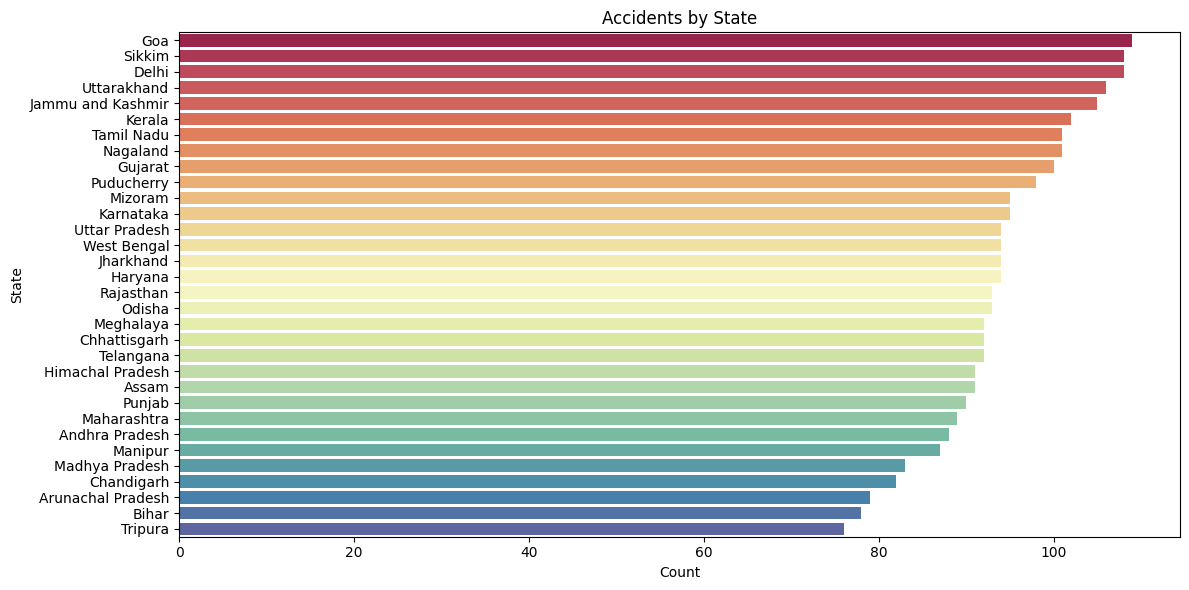

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(y='state_name', data=df, order=df['state_name'].value_counts().index, palette='Spectral')
plt.title("Accidents by State")
plt.xlabel("Count")
plt.ylabel("State")
plt.tight_layout()
plt.show()

Severity Distribution

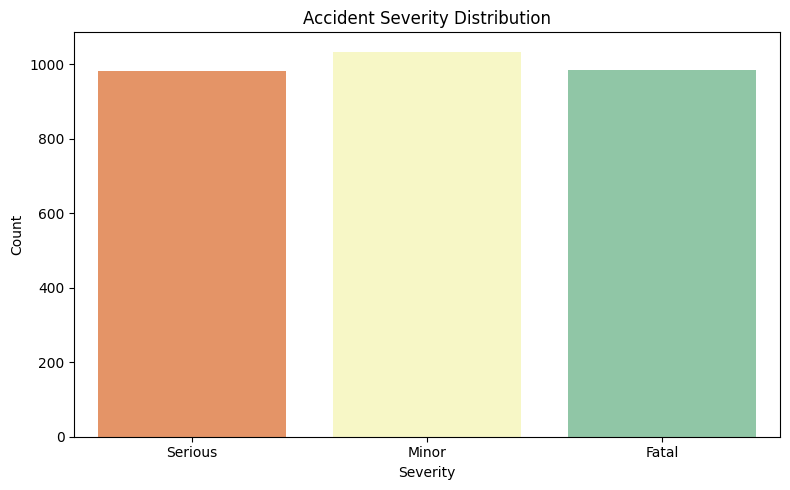

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x='accident_severity', data=df, palette='Spectral')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Day of the Week

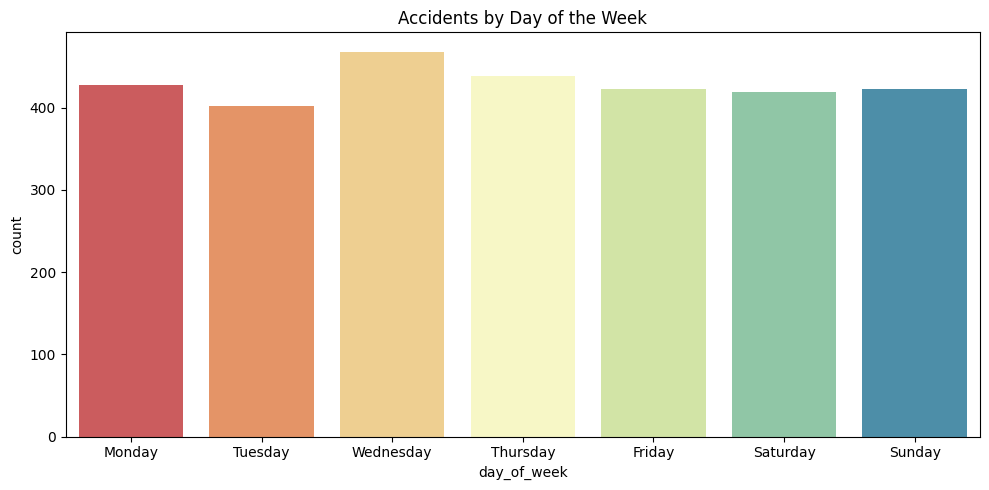

In [46]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,5))
sns.countplot(x='day_of_week', data=df, order=week_order, palette='Spectral')
plt.title("Accidents by Day of the Week")
plt.tight_layout()
plt.show()

Time of Day

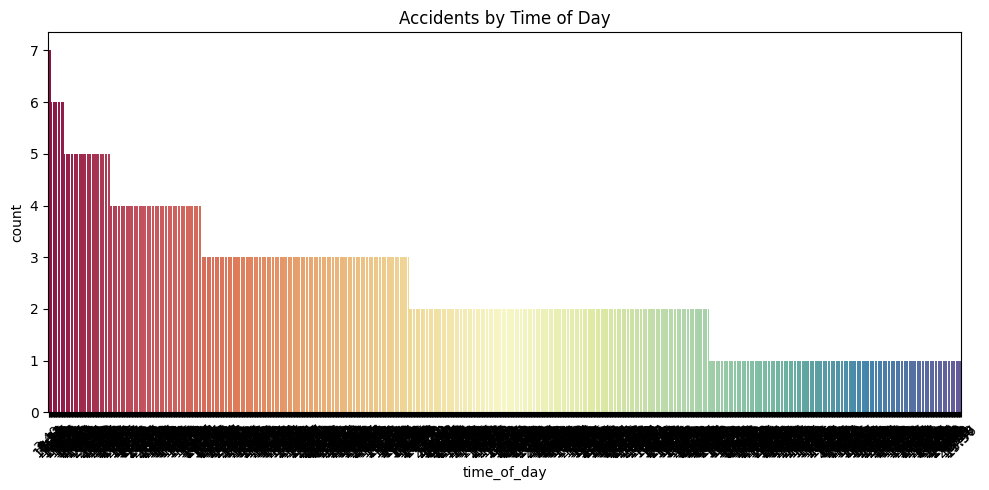

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='time_of_day', data=df, order=df['time_of_day'].value_counts().index, palette='Spectral')
plt.title("Accidents by Time of Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vehicle Types

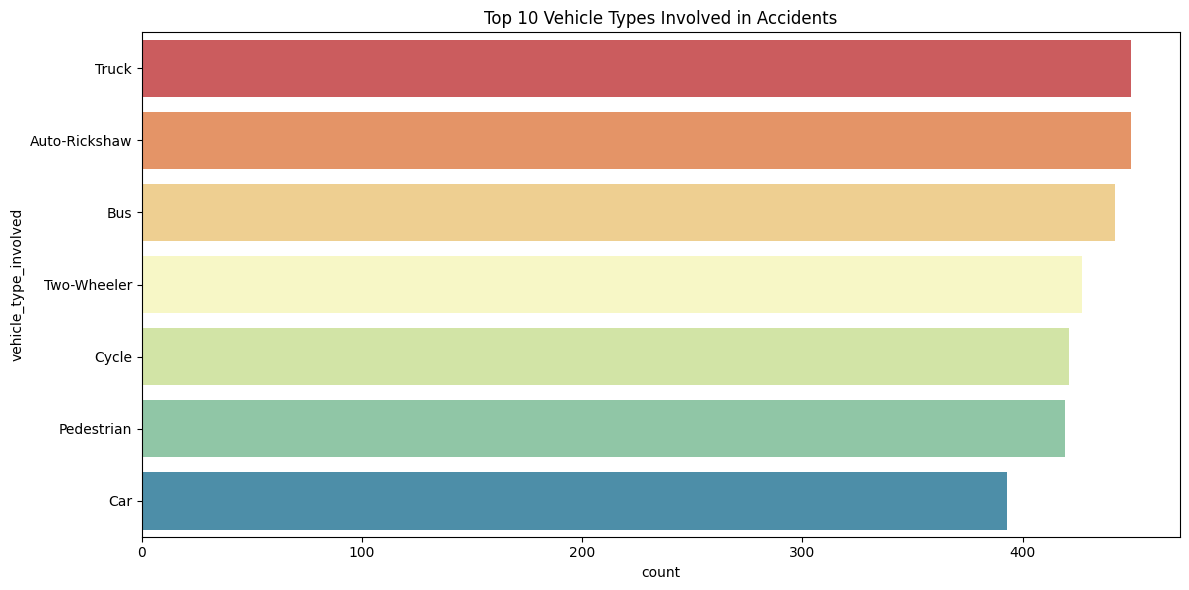

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(y='vehicle_type_involved', data=df, order=df['vehicle_type_involved'].value_counts().index[:10], palette='Spectral')
plt.title("Top 10 Vehicle Types Involved in Accidents")
plt.tight_layout()
plt.show()

 Weather Conditions

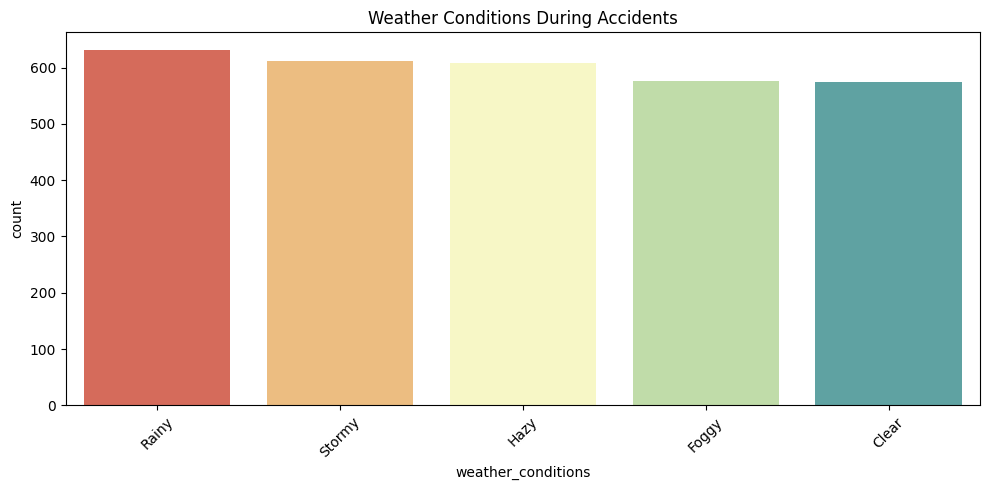

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='weather_conditions', data=df, order=df['weather_conditions'].value_counts().index, palette='Spectral')
plt.title("Weather Conditions During Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Road Type & Condition

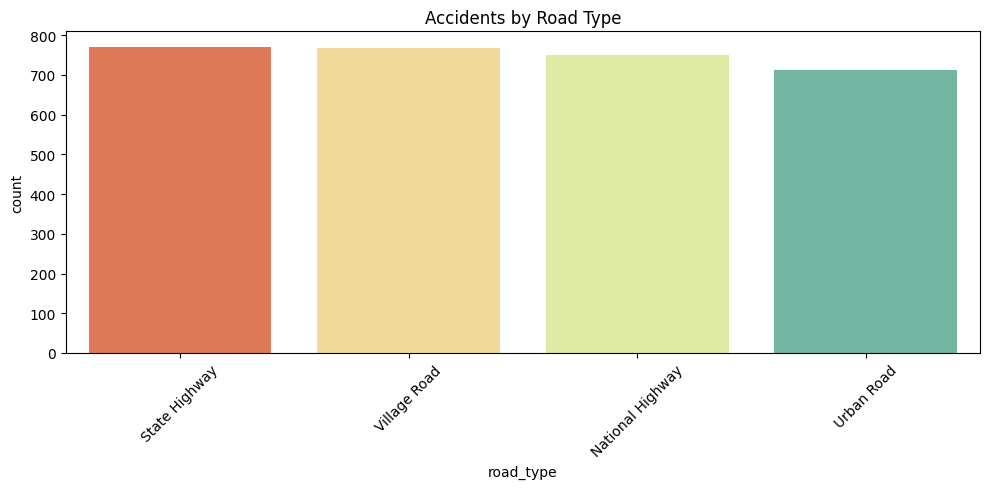

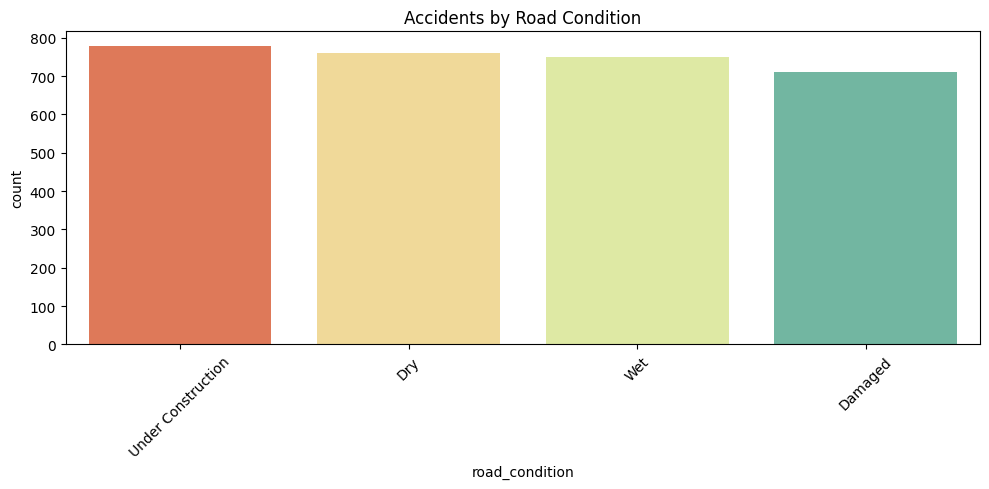

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x='road_type', data=df, order=df['road_type'].value_counts().index, palette='Spectral')
plt.title("Accidents by Road Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='road_condition', data=df, order=df['road_condition'].value_counts().index, palette='Spectral')
plt.title("Accidents by Road Condition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation Heatmap

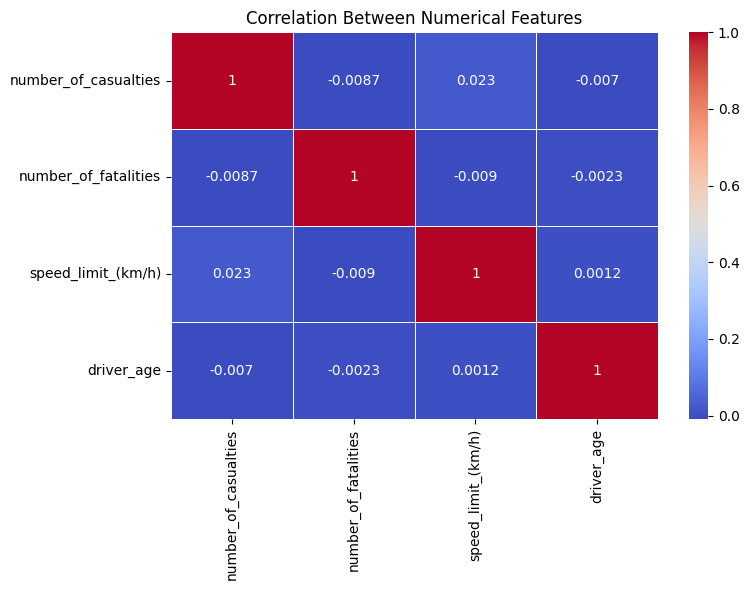

In [51]:
numerics = ['number_of_casualties', 'number_of_fatalities', 'speed_limit_(km/h)', 'driver_age']
plt.figure(figsize=(8,6))
sns.heatmap(df[numerics].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()